In [1]:
from scipy import ndimage
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from imgTools import *

In [2]:
# Đọc ảnh
image_path = 'C:/Users/hoang/Desktop/Image/starts.jpg'
image = Image.open(image_path)

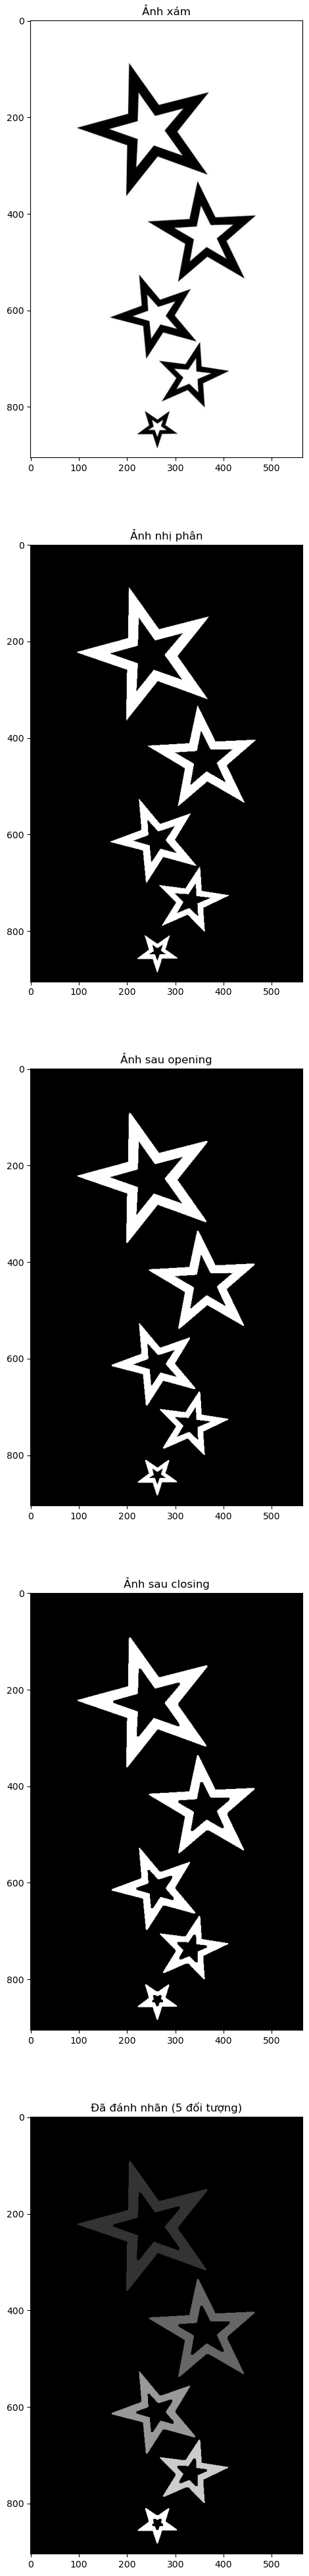

In [3]:

# Chuyển sang ảnh xám
gray_image = image.convert('L')

image_array = np.array(gray_image)

# Chuyển sang ảnh nhị phân
binary_image = 1*(image_array<200)

# Thực hiện opening để loại bỏ nhiễu và nối các đối tượng
opened_image = ndimage.binary_opening(binary_image, structure=np.ones((3,3)))
# Thực hiện closing để giảm nhiễu và lấp đầy các khoảng trống nhỏ
closed_image = ndimage.binary_closing(opened_image, structure=np.ones((5,5)))

# Đánh nhãn
labeled_image, num_features = ndimage.label(closed_image)

# Tạo lưới subplot với 4 dòng và 1 cột
fig, axs = plt.subplots(5, 1, figsize=(50, 50))

plt.subplot(5,1,1)
plt.imshow(gray_image, cmap='gray')
plt.title("Ảnh xám")

plt.subplot(5,1,2)
plt.imshow(binary_image, cmap='gray')
plt.title("Ảnh nhị phân")
                                      
plt.subplot(5,1,3)
plt.imshow(opened_image, cmap='gray')
plt.title("Ảnh sau opening")

plt.subplot(5,1,4)
plt.imshow(closed_image, cmap='gray')
plt.title("Ảnh sau closing")

plt.subplot(5,1,5)
plt.imshow(labeled_image, cmap='gray')
plt.title(f"Đã đánh nhãn ({num_features} đối tượng)")

plt.show();